In [4]:
import base64
with open("my_image.jpeg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIBQAEaQMBIgACEQEDEQH/xAAxAAEBAQEBAQEAAAAAAAAAAAAAAQIDBAUGAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAvpDj1qUBAWpQAlAAAAAFgoIABQEKlIAAAAAAAAABYKFSiAAACAAAAABSAACwACywAAWCkAAAAAAAAAAAAAAAABAACAWCpQABYFgoAAAAAFgAAqUSiWAAAAAogFlAEAsAVZQAIASiALAABYAAACiLAsRYAULAAAAAAAAAABSAAAAAAAIACwAgFgoAAFBFIoAAAAAALCpSLCywKIoiwoIoEKlAEoCAVKIolgoAAAAAIoigAAAgsAAAUgAQAKCAAoAAAABUAAAAAABCwAAM0ABQAAUgAKgqCgAAFABCgAAAAlAAIilAAAELAoAIoAAAAAAAAAECiUBAsAAAAAAAQAAKAAUEolQsAAAABKIsAAM0ABQAAABYKQqUAAAWUAAAAAACAUAABKEsKAACUAAAAAAAAAAAAAAAAABAAUiiAAAAFsgAFABKBAUiwAAAiwAAzZQACgAWABZQAAAACgAAAABQgAAAAAAAUiwAAAFIoiiFIoiwAAAAAAAAASiUCAAUiiAAoEogpYQolQsAsABSLAABLAADJQACgAAAWCgJQAUAAAAABQgAAAAAACoAAAAABSLBYKgqCoKgqCoAAACwAAQAAAFgUCABYKgALKFJUQUihAsUiwAAEAAMgqUAWUAAAAVCgAFAAAAAAUIAAAAAAAAAAAAKICoKgqCoFFgAQUgAAAA

(np.float64(-0.5), np.float64(1128.5), np.float64(1279.5), np.float64(-0.5))

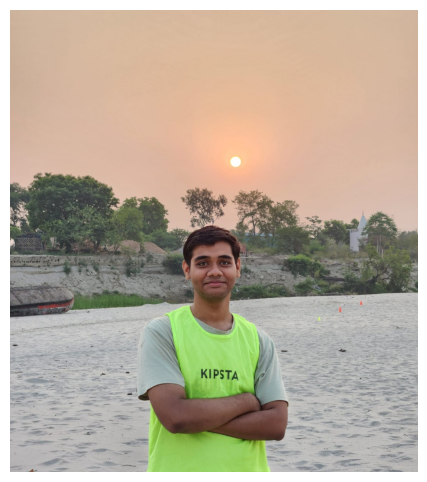

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr=cv2.imread('my_image.jpeg')
img_rgb=cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")

(np.float64(-0.5), np.float64(1128.5), np.float64(1279.5), np.float64(-0.5))

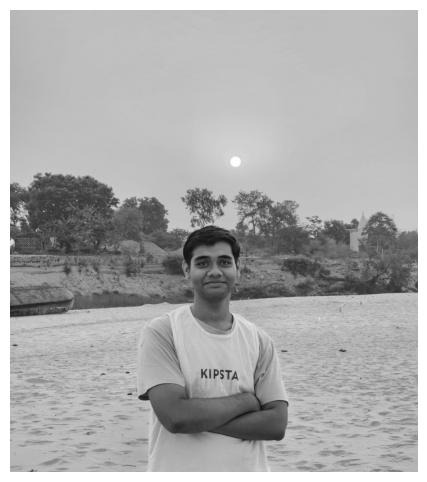

In [6]:
img_gray=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(img_gray,cmap='gray')
plt.axis('off')

In [7]:
print(f"Shape of RGB image: {img_rgb.shape}")
print(f"Shape of Grayscale image: {img_gray.shape}")

print("\n pixel values of RGB image (top-left corner):\n", img_rgb[:2, :2])
print("\n pixel values of Grayscale image (top-left corner):\n", img_gray[:1, :2])

Shape of RGB image: (1280, 1129, 3)
Shape of Grayscale image: (1280, 1129)

 pixel values of RGB image (top-left corner):
 [[[205 179 156]
  [205 179 156]]

 [[205 179 156]
  [205 179 156]]]

 pixel values of Grayscale image (top-left corner):
 [[184 184]]


In [8]:
import numpy as np

f = np.fft.fft2(img_gray)

fshift = np.fft.fftshift(f)

print("Shape of fshift:", fshift.shape)

Shape of fshift: (1280, 1129)


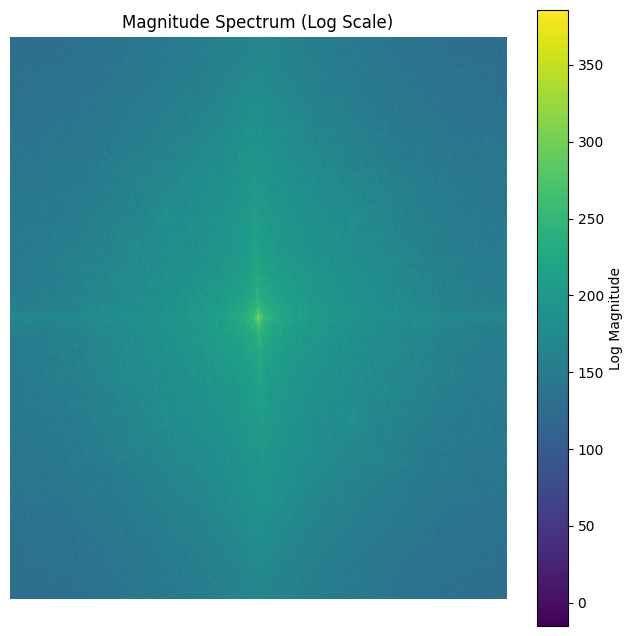

Shape of magnitude_spectrum: (1280, 1129)
Shape of phase_spectrum: (1280, 1129)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

magnitude_spectrum = 20 * np.log(np.abs(fshift))

phase_spectrum = np.angle(fshift)

plt.figure(figsize=(8, 8))
plt.imshow(magnitude_spectrum, cmap='viridis')
plt.title('Magnitude Spectrum (Log Scale)')
plt.colorbar(label='Log Magnitude')
plt.axis('off')
plt.show()

print(f"Shape of magnitude_spectrum: {magnitude_spectrum.shape}")
print(f"Shape of phase_spectrum: {phase_spectrum.shape}")

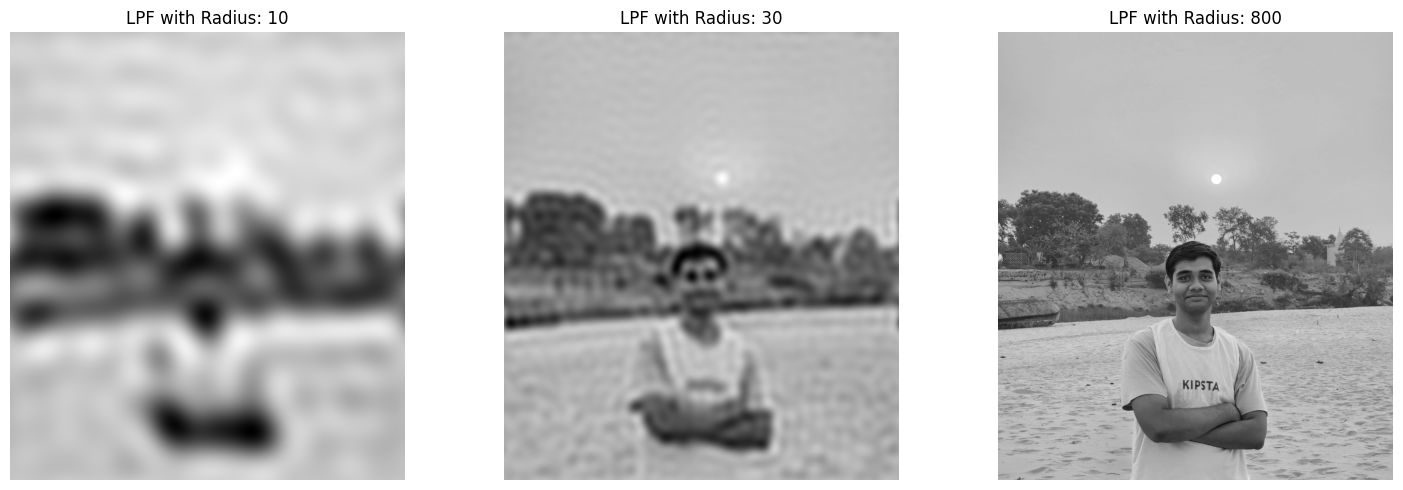

In [10]:
import numpy as np
import matplotlib.pyplot as plt

filter_radii = [10, 30, 800]

rows, cols = fshift.shape

crow, ccol = rows // 2, cols // 2
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))

distance = np.sqrt((X - ccol)**2 + (Y - crow)**2)

plt.figure(figsize=(15, 5))

for i, radius in enumerate(filter_radii):

    mask = distance <= radius

    fshift_filtered = fshift * mask

    f_filtered = np.fft.ifftshift(fshift_filtered)

    img_filtered = np.fft.ifft2(f_filtered)

    img_filtered = np.abs(img_filtered)

    plt.subplot(1, len(filter_radii), i + 1)
    plt.imshow(img_filtered, cmap='gray')
    plt.title(f'LPF with Radius: {radius}')
    plt.axis('off')

# Explanation for blurring:
# As the radius of the low-pass filter decreases, more high-frequency components
# are removed from the image's Fourier Transform. High-frequency components
# correspond to sharp edges, details, and rapid changes in pixel intensity.
# By removing these components, the reconstructed image loses its fine details
# and edges become smoother, resulting in increased blurring. A larger radius
# allows more high-frequency information to pass through, leading to a sharper image.

plt.tight_layout()
plt.show()

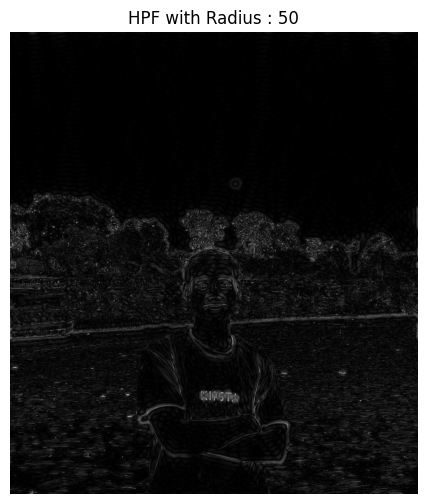

In [11]:
import numpy as np
import matplotlib.pyplot as plt

rows, cols = fshift.shape

crow, ccol = rows // 2, cols // 2
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
distance = np.sqrt((X - ccol)**2 + (Y - crow)**2)

hpf_radius=50

lpf_mask = distance <= hpf_radius

hpf_mask = 1 - lpf_mask

fshift_hpf_filtered = fshift * hpf_mask

f_hpf_filtered = np.fft.ifftshift(fshift_hpf_filtered)

img_hpf_filtered = np.fft.ifft2(f_hpf_filtered)

img_hpf_filtered = np.abs(img_hpf_filtered)

plt.figure(figsize=(6, 6))
plt.imshow(img_hpf_filtered, cmap='gray')
plt.title(f'HPF with Radius : {hpf_radius}')
plt.axis('off')
plt.show()

# Explanation for HPF using inverted LPF:
# By creating an LPF mask that passes frequencies within a certain radius and then
# subtracting it from 1, we effectively create an HPF mask that passes frequencies
# *outside* that radius. This is an equivalent way to construct an ideal binary HPF mask.

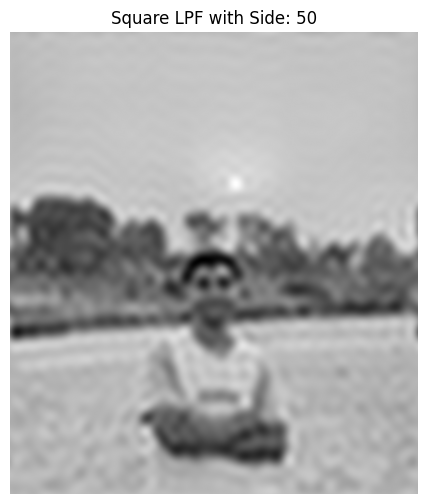

In [12]:
import numpy as np
import matplotlib.pyplot as plt

side_length = 50

rows, cols = fshift.shape

square_lpf_mask = np.zeros((rows, cols), dtype=np.uint8)

crow, ccol = rows // 2, cols // 2

x_start = max(0, ccol - side_length // 2)
x_end = min(cols, ccol + side_length // 2)
y_start = max(0, crow - side_length // 2)
y_end = min(rows, crow + side_length // 2)

square_lpf_mask[y_start:y_end, x_start:x_end] = 1

fshift_filtered_square = fshift * square_lpf_mask

f_filtered_square = np.fft.ifftshift(fshift_filtered_square)

img_filtered_square = np.fft.ifft2(f_filtered_square)

img_filtered_square = np.abs(img_filtered_square)

plt.figure(figsize=(6, 6))
plt.imshow(img_filtered_square, cmap='gray')
plt.title(f'Square LPF with Side: {side_length}')
plt.axis('off')
plt.show()

# Explanation for square LPF:
# Similar to the circular LPF, the square LPF allows low-frequency components
# within a square region to pass through, blocking higher frequencies outside this region.
# The result is a blurred image, as fine details and sharp edges (high frequencies) are removed.
# The shape of the filter (square vs. circular) can introduce different types of artifacts
# or directional blurring effects due to how it truncates the frequency spectrum.

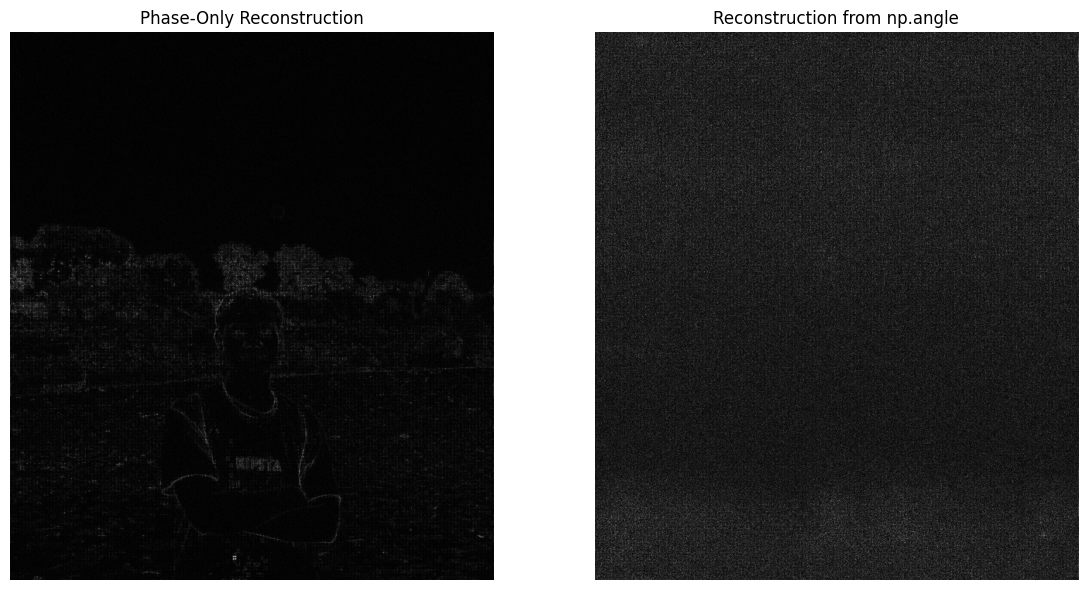

In [13]:
import numpy as np
import matplotlib.pyplot as plt

phase_only_complex = fshift / np.abs(fshift)

f_phase_only_shifted = np.fft.ifftshift(phase_only_complex)

img_phase_only_reconstructed = np.fft.ifft2(f_phase_only_shifted)

img_phase_only_reconstructed = np.abs(img_phase_only_reconstructed)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_phase_only_reconstructed, cmap='gray')
plt.title('Phase-Only Reconstruction')
plt.axis('off')

reconstruction_from_angle_input = np.exp(2j * phase_spectrum)

f_angle_shifted = np.fft.ifftshift(reconstruction_from_angle_input)

img_angle_reconstructed = np.fft.ifft2(f_angle_shifted)

img_angle_reconstructed = np.abs(img_angle_reconstructed)

plt.subplot(1, 2, 2)
plt.imshow(img_angle_reconstructed, cmap='gray')
plt.title('Reconstruction from np.angle')
plt.axis('off')

plt.tight_layout()
plt.show()

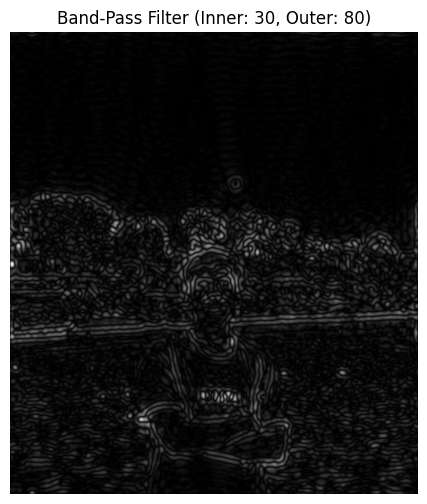

In [14]:
import numpy as np
import matplotlib.pyplot as plt

inner_radius = 30
outer_radius = 80

rows, cols = fshift.shape

crow, ccol = rows // 2, cols // 2
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
distance = np.sqrt((X - ccol)**2 + (Y - crow)**2)

band_pass_mask = (distance >= inner_radius) & (distance <= outer_radius)

fshift_bpf_filtered = fshift * band_pass_mask

f_bpf_filtered = np.fft.ifftshift(fshift_bpf_filtered)

img_bpf_filtered = np.fft.ifft2(f_bpf_filtered)

img_bpf_filtered = np.abs(img_bpf_filtered)

plt.figure(figsize=(6, 6))
plt.imshow(img_bpf_filtered, cmap='gray')
plt.title(f'Band-Pass Filter (Inner: {inner_radius}, Outer: {outer_radius})')
plt.axis('off')
plt.show()

# Explanation for Band-Pass Filter:
# A Band-Pass Filter isolates frequency components within a specific range.
# In the spatial domain, this corresponds to enhancing features of a certain scale
# while suppressing very coarse (low-frequency) and very fine (high-frequency) details.
# The resulting image will often highlight edges or textures that correspond to the
# chosen frequency band, appearing as outlines or specific patterns, with other
# information being attenuated or removed.

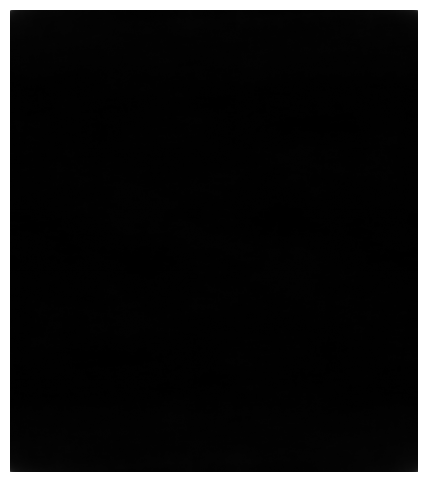

In [15]:
import numpy as np
import matplotlib.pyplot as plt

mag_only_complex = np.abs(fshift)

mag_only_complex = mag_only_complex + 0j

f_mag_only_shifted = np.fft.ifftshift(mag_only_complex)

img_mag_only_reconstructed = np.fft.ifft2(f_mag_only_shifted)

img_mag_only_reconstructed = np.abs(img_mag_only_reconstructed)

plt.figure(figsize=(6, 6))
plt.imshow(img_mag_only_reconstructed, cmap='gray')
plt.axis('off')
plt.show()

# Code comment on why this looks different than the Magnitude Spectrum visualization:
# The `magnitude_spectrum` that was previously displayed was a *logarithmic visualization* of the magnitudes.
# It was not the raw magnitude data itself. For reconstruction, we use the *raw* magnitude data (`np.abs(fshift)`),
# not its log-transformed version. Therefore, the reconstructed image reflects the true distribution
# of energy across frequencies without the visual compression applied by the logarithm. This often results
# in a reconstructed image that is largely dominated by the low-frequency components, appearing as
# a bright, blurred circle or blob, with very little discernible structure from the original image.
# This contrasts sharply with phase-only reconstruction, which retains much of the image's structural content,
# further emphasizing the critical role of phase in image perception.

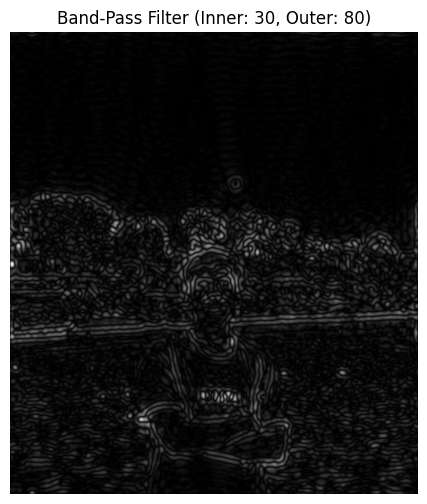

In [16]:
import numpy as np
import matplotlib.pyplot as plt

inner_radius = 30
outer_radius = 80

rows, cols = fshift.shape

crow, ccol = rows // 2, cols // 2
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
distance = np.sqrt((X - ccol)**2 + (Y - crow)**2)

band_pass_mask = (distance >= inner_radius) & (distance <= outer_radius)

fshift_bpf_filtered = fshift * band_pass_mask

f_bpf_filtered = np.fft.ifftshift(fshift_bpf_filtered)

img_bpf_filtered = np.fft.ifft2(f_bpf_filtered)

img_bpf_filtered = np.abs(img_bpf_filtered)

plt.figure(figsize=(6, 6))
plt.imshow(img_bpf_filtered, cmap='gray')
plt.title(f'Band-Pass Filter (Inner: {inner_radius}, Outer: {outer_radius})')
plt.axis('off')
plt.show()

# Explanation for Band-Pass Filter:
# A Band-Pass Filter isolates frequency components within a specific range.
# In the spatial domain, this corresponds to enhancing features of a certain scale
# while suppressing very coarse (low-frequency) and very fine (high-frequency) details.
# The resulting image will often highlight edges or textures that correspond to the
# chosen frequency band, appearing as outlines or specific patterns, with other
# information being attenuated or removed.

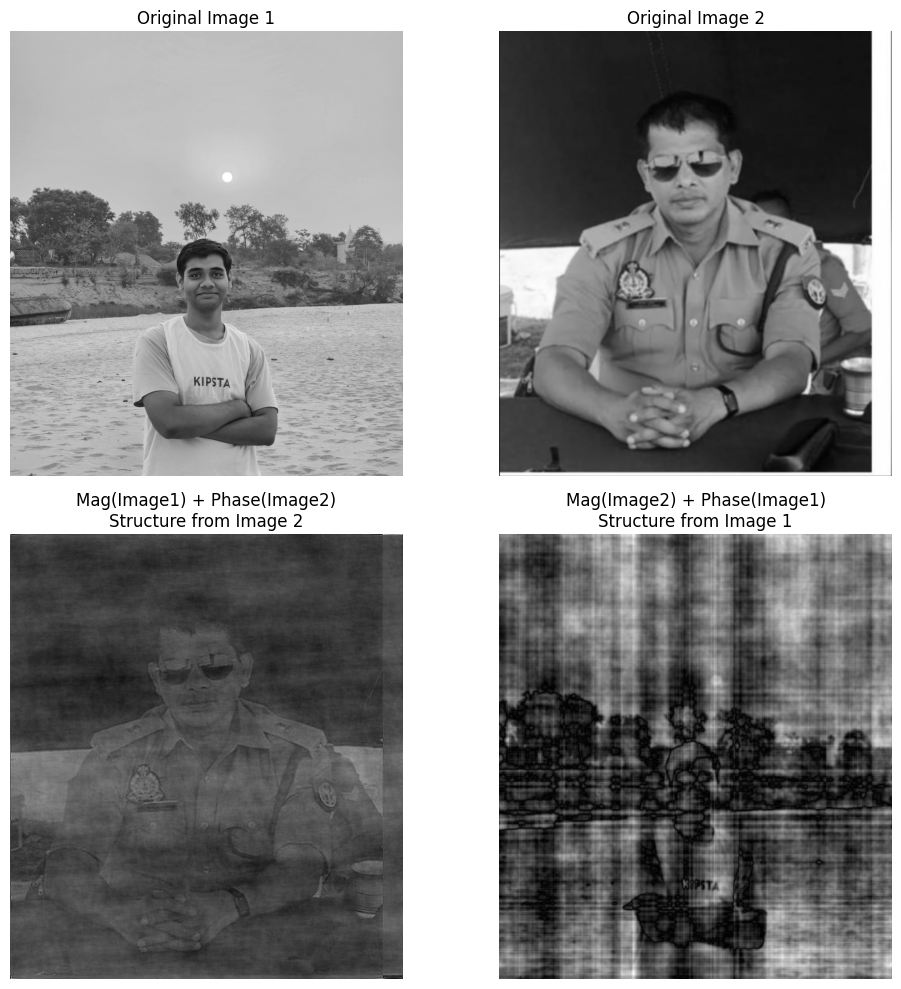

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('my_image.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('my_image2.png', cv2.IMREAD_GRAYSCALE)

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)

f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)

magnitude1 = np.abs(fshift1)
phase1 = np.angle(fshift1)

magnitude2 = np.abs(fshift2)
phase2 = np.angle(fshift2)

# F'1 = |F1|e^(iθ2), F'2 = |F2|e^(iθ1)
F_prime1 = magnitude1 * np.exp(1j * phase2)
F_prime2 = magnitude2 * np.exp(1j * phase1)

f_prime1_shifted = np.fft.ifftshift(F_prime1)
img_hybrid1 = np.abs(np.fft.ifft2(f_prime1_shifted))

f_prime2_shifted = np.fft.ifftshift(F_prime2)
img_hybrid2 = np.abs(np.fft.ifft2(f_prime2_shifted))

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_hybrid1, cmap='gray')
plt.title('Mag(Image1) + Phase(Image2)\nStructure from Image 2')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_hybrid2, cmap='gray')
plt.title('Mag(Image2) + Phase(Image1)\nStructure from Image 1')
plt.axis('off')

plt.tight_layout()
plt.show()

# Code comment:
# This experiment demonstrates that PHASE information determines the structural
# content and recognizable features of an image, while MAGNITUDE primarily
# affects the texture and tonal qualities. When we swap them:
# - The hybrid takes its STRUCTURE from the phase source
# - The hybrid takes its TEXTURE/APPEARANCE from the magnitude source
# You will recognize the hybrid as the image that provided the phase!